## Chi-Squared Analysis

### First Question: Did more women and children survived compared to men?

#### Dataset from Canvas (Titanic Passenger List.csv)

In [121]:
import pandas as pd

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
    - 
- What kind of data is the `gender` (indep, variable)?

Two Types:
- `Ordinal` data, Data that can be ordered
- `Categorical/nominal`, Data that can not be ordered

In [122]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


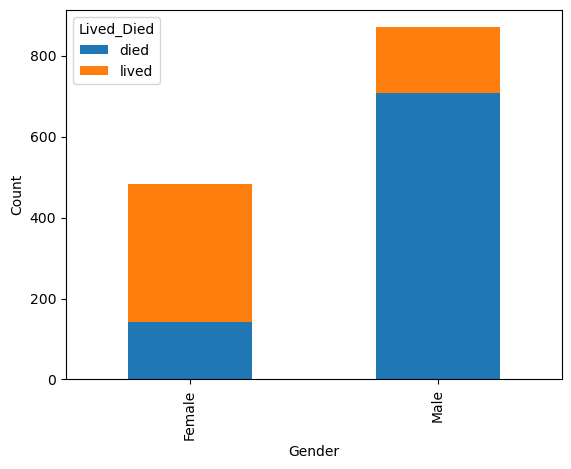

In [123]:
# Task: Create a stacked bar char showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
# exclude the last column and row (summary info)
# contingency_table.iloc[:-1, :-1].plot(kind='bar', stacked=True)

contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.show()

In [124]:
from scipy import stats     # For chi2_contingency
print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1) Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure chance
# 2) Target P-value
# 3) Degrees of freedom: 1 degree of freedom, (r rows -1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Squared Example: Was Age relevant?

In [125]:
# Check the age column. It is already fixed for age at the time of incident

# What about null values?

# Create the bins
# passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
passenger_df['age_bins'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10))

contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


C:\Users\gaith\AppData\Local\Temp\ipykernel_27080\1991630058.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)


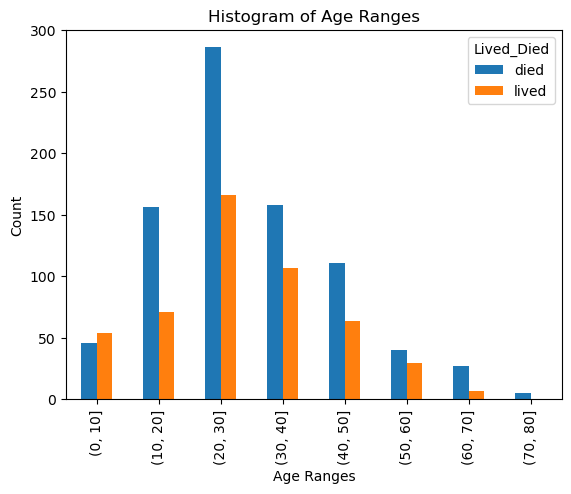

In [126]:
# contingency_table.plot(kind='hist')
passenger_df.groupby(['age_bins', 'Lived_Died']).size().unstack().plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('Age Ranges')
plt.title('Histogram of Age Ranges')
plt.show()

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()


,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


C:\Users\gaith\AppData\Local\Temp\ipykernel_27080\1270058851.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # Use a pivottable
C:\Users\gaith\AppData\Local\Temp\ipykernel_27080\1270058851.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


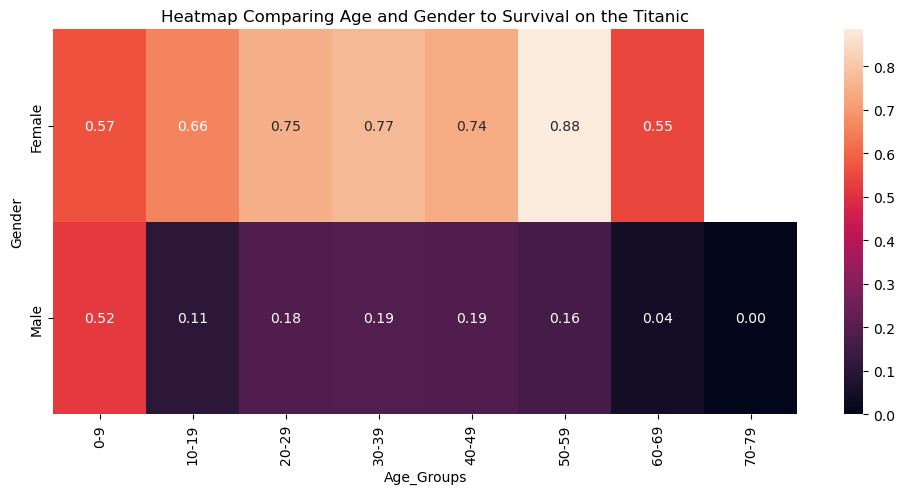

In [128]:
# Drop columns you do not need
passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
passenger_df.dropna(inplace=True) # drop null values
# Encode the categorical data
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Groups'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10)) # create bins
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups']) # Use a pivottable
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap

# Create a heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)
plt.show()

## TASK: Did the Titanic Passenger Class Affected Survivorship?

In this case, the data is `ordinal` because we can order the categories from first to third

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [130]:
# Create a contingency table
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=True)
contingency_table

Lived_Died,died,lived,All
Passenger_Class,,,
1,149,201,350
2,175,118,293
3,528,181,709
All,852,500,1352


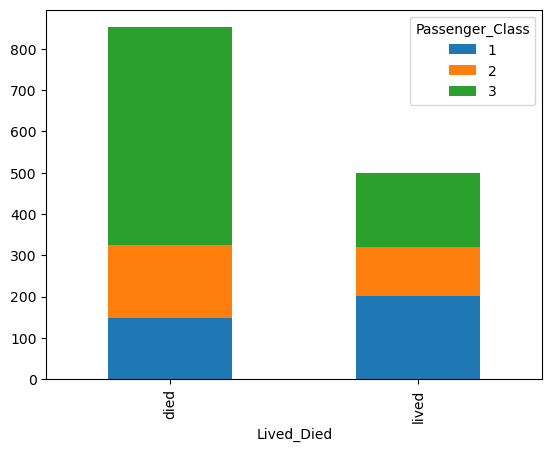

In [131]:
# Create a Bar Plot with the data stacked
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)
plt.show()

In [132]:
# Run a chi2_contingency on the table
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)
stats.chi2_contingency(contingency_table)[0:3]

(104.05195288933228, 2.543346399916496e-23, 2)

Which passenger class is responsible for the significant difference in survival rate?
- Chi-square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent
- Since this is our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compared every passenger class to every other class to see if there is statistical significance between the two.
- We could apply a `Chi-square` test for each of the three separate comparison, but our sample data is too small.
- In this case, `Fisher's Exact` test is a better option

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
contingency_table

Lived_Died,died,lived
Passenger_Class,,
1,149,201
2,175,118
3,528,181


In [134]:
first_class = contingency_table.iloc[0].values      # extract row values
second_class = contingency_table.iloc[1].values      # extract row values
third_class = contingency_table.iloc[2].values      # extract row values
# Create a Fisher's test to determine if there is a relationship between passenger class and survival
oddsratio, pvalue = stats.fisher_exact([first_class, second_class])
print(f'Fisher\'s Exact test for First and Second Class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fisher\'s Exact test for First and Third Class: {pvalue}')
oddsratio, pvalue = stats.fisher_exact([second_class, third_class])
print(f'Fisher\'s Exact test for Second and Third Class: {pvalue}')


Fisher's Exact test for First and Second Class: 1.827149276703859e-05
Fisher's Exact test for First and Third Class: 7.457205699022123e-24
Fisher's Exact test for Second and Third Class: 5.007621820657881e-06


Each of the Fisher's Test reveals statistical significance

Another way to conceptualize this result is to look at percentages:

| Passenger Class   |   Died    |
|-------------------|-----------|
| First Class       |   43%     |
| Second Class      |   60%     |
| Third Class       |   74%     |

TODO: Create a heatmap of  Passenger Class split in Age_Ranges by Gender and survival rate

C:\Users\gaith\AppData\Local\Temp\ipykernel_27080\4149647384.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class']) # Use a pivottable
C:\Users\gaith\AppData\Local\Temp\ipykernel_27080\4149647384.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


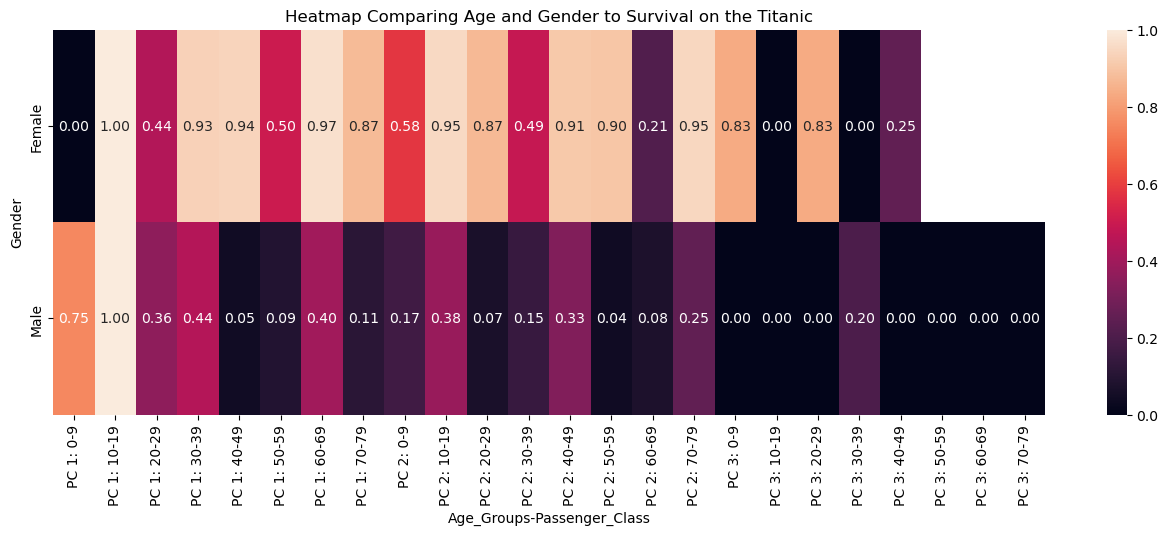

In [135]:
# Drop columns you do not need
passenger_df.drop(['Name', 'Born', 'Died', 'Fare', 'Fare_decimal'], axis=1, inplace=True)
passenger_df.dropna(inplace=True) # drop null values
# Encode the categorical data
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Groups'] = pd.cut(x=passenger_df['Age'], bins=range(0, 90, 10)) # create bins
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class']) # Use a pivottable
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap

# Create a heatmap
plt.figure(figsize=(16,5))
x_axis_labels = [
    'PC 1: 0-9', 'PC 1: 10-19', 'PC 1: 20-29', 'PC 1: 30-39', 'PC 1: 40-49', 'PC 1: 50-59', 'PC 1: 60-69', 'PC 1: 70-79',
    'PC 2: 0-9', 'PC 2: 10-19', 'PC 2: 20-29', 'PC 2: 30-39', 'PC 2: 40-49', 'PC 2: 50-59', 'PC 2: 60-69', 'PC 2: 70-79',
    'PC 3: 0-9', 'PC 3: 10-19', 'PC 3: 20-29', 'PC 3: 30-39', 'PC 3: 40-49', 'PC 3: 50-59', 'PC 3: 60-69', 'PC 3: 70-79'
    ]
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)
plt.show()

### T-Test: Fare and Gender

While `Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-Test` and `ANOVA` test, target `continuous` data

#### How was Fare (price of passage0) Affected by Gender and Passenger Class
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes?
- Is there an interaction between gender and passenger class on the resulting fare?

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy import stats

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

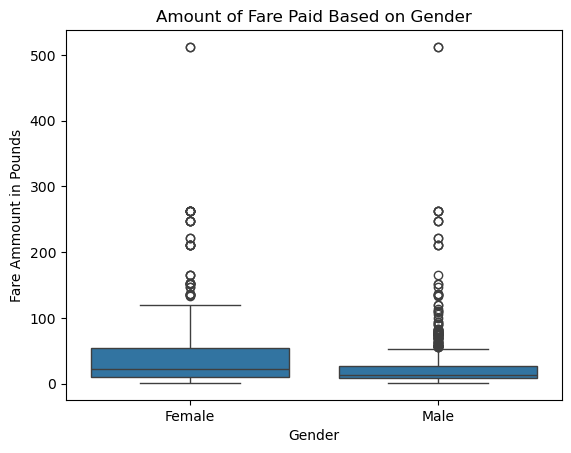

In [137]:
# Visualize data using boxplot
sns.boxplot(y = passenger_df['Fare_decimal'], x = passenger_df['Gender'])
plt.ylabel('Fare Ammount in Pounds')
plt.title('Amount of Fare Paid Based on Gender')
plt.show()

In [138]:
male = passenger_df[passenger_df['Gender'] == 'Male']
print(f"Male Summary {male['Fare_decimal'].describe()}")


Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [139]:
female = passenger_df[passenger_df['Gender'] == 'Female']
print(f"Female Summary {female['Fare_decimal'].describe()}")


Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [140]:
from scipy.stats import ttest_ind
# Drop null values
passenger_df.dropna(inplace=True)
male = passenger_df[passenger_df['Gender'] == 'Male']
female = passenger_df[passenger_df['Gender'] == 'Female']
# Run test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value {pvalue}')

T-Test for Fare Paid p-value 6.093364811911871e-13


## ANOVA Example: Price Difference Between Passenger Class
- `T-Test` specializes in comparing `two` populations
- `ANOVA (Analysis of Variance)` test will allow you to compare the influence of `three or more` populations

Fair prices are `continuous numerical dependent variable.` They are affected by the three passenger classes.

Install new package:
```bash
conda install statsmodels
```

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

In [142]:
# Load your OLS (Ordinary Least Square) model.
model = ols('Fare_decimal ~ C(Passenger_Class)', data=passenger_df).fit()
# ANOVA table
anova_table = sm.stats.anova_lm(model, type=1) # type = # is the anova table format
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Passenger_Class),2.0,1.201111e+06,600555.522821,338.116478,2.964452e-119
Residual,1318.0,2.341004e+06,1776.179397,NaN,NaN


`PR(>F)` is your `P-value`

#### ANOVA Notation (R-style Formulas):
- The `~` char separates the left side from the right side
- The `+` char add a new separated column to the design matrix
- The `:` char adds a new interaction column to the model matrix
- The `*` char signifies the both individual columns are combined

The string `Fare_decimal ~ C(Passenger_Class)` translates to:
- Fare decimal variable is affected by the categorical variable (`C`) Passenger Class

Conclusion, there is some difference in price relative ot the passenger class.

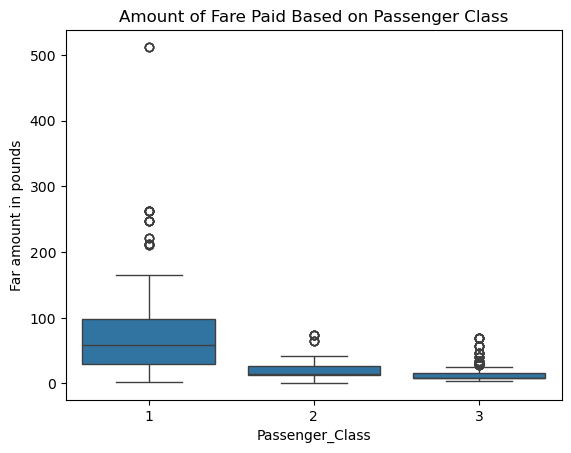

In [143]:
# Create a box plot of the fare paid by passenger class
sns.boxplot(y=passenger_df['Fare_decimal'], x=passenger_df['Passenger_Class'])
plt.ylabel('Far amount in pounds')
plt.title('Amount of Fare Paid Based on Passenger Class')
plt.show()

Do a `post-hoc` test on this, For ANOVA we use the `Turkey HSD` test to compare each individual population from a statistically significant ANOVA

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.drop(columns=['Born', 'Died', 'Fare', 'Lived_Died', 'Name', 'Gender'], inplace=True) # Drop unused columns
passenger_df.dropna(inplace=True)

In [147]:
mc = MultiComparison(passenger_df['Fare_decimal'], passenger_df['Passenger_Class'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-64.5942,0.0,-72.6865,-56.5018,True
1,3,-72.9052,0.0,-79.4909,-66.3195,True
2,3,-8.311,0.016,-15.3695,-1.2525,True


If no statistical significance is found, then the `reject` column will indicate `False`, that is, the `null-hypothesis` cannot be rejected